## 2. Projekt – Boston Housing Dataset (sklearn)


In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Importierung und Bearbeitung der Daten
===============================

Die Verarbeitung unserer Daten werden wir nicht mehr wiederholen, da dies bereits im vorherigen Projekt geschehen war. In diesem Fall importieren wir einfach die Daten und gehen direkt zur Erstellung des Modells über, diesmal mit dem Sklearn-Modul.

In [2]:
boston_data = load_boston()
# Transformation unseres Datensatzes in Data Frame
boston_df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
#Wir erstellen eine neue Spalte mit dem Namen PREIS, die MEDV aus dem Dataset entspricht. 
boston_df['PREIS'] = boston_data.target
boston_df.head() # Schauen die ersten 5 Elemente unseres Datasatzes an

c:\Users\Steve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PREIS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Wir bauen jetzt unsere Model ( Lineare Regression ) mit sklearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = boston_data.data
y = boston_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trainig des linearen Regressionsmodells

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Berechnung der Vorhersagen

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Wir führen Schätzungen durch, um herauszufinden, wie gut unser Modell ist.

In [7]:
# Trainingsdaten
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training: R2={r2_train:6.2f}  | MSE={mse_train:8.2f}")
# Testdaten
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test: R2={r2_test:6.2f} | MSE={mse_test:8.2f}")
rmse_test=np.sqrt(mse_test)

Training: R2=  0.75  | MSE=   21.64
Test: R2=  0.67 | MSE=   24.29


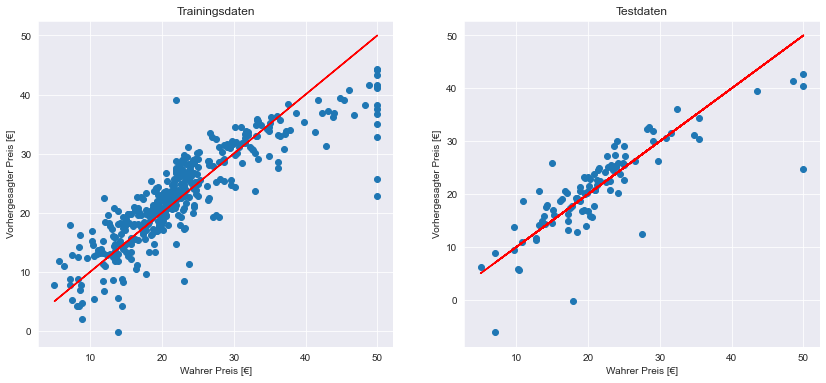

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
# Trainingsdaten
ax1.scatter(y_train, y_train_pred)
ax1.plot(y_train, y_train, 'r')
ax1.set_title("Trainingsdaten")
ax1.set(xlabel='Wahrer Preis [€]', ylabel='Vorhergesagter Preis [€]')
# Testdaten
ax2.scatter(y_test, y_test_pred)
ax2.plot(y_test, y_test,'r')
ax2.set_title("Testdaten")
ax2.set(xlabel='Wahrer Preis [€]', ylabel='Vorhergesagter Preis [€]')
plt.show()


Hier sehen wir, dass unser Modell nicht sehr performant ist, da die Kostenfunktion auf Testdaten und Trainingsdaten, die wir erhalten haben, nicht gut sind. Nach der Visualisierung haben wir festgestellt, dass unsere Daten nicht linear, sondern eher nicht-linear sein könnten, d.h. der Grad ist größer als eins. In diesem Fall sprechen wir von einer Polynomfunktion der Form `ax^p +bx^(p-1) +c.`
Um dieses Problem zu lösen, verwenden wir immer noch unser lineares Modell, aber dieses Mal erhöhen wir einfach die Leistung unserer verschiedenen Merkmale, so dass wir die statistischen Werte für die Kosten und den mean squared error erhalten.


Skalierung und polynomiale Features
----------------------------

Wir werden auch hier unsere Trainingsdaten aufteilen, damit wir unsere Hyperparameter einstellen und die Maschine unter ihren Daten trainieren können.
Hier werden wir also 60% für Trainingsdaten, 20% für Validierungsdaten und 20% für Testdaten nehmen.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5)

In [11]:
pmax = 5 # maximale Anzahl der Potenz
result = np.zeros((pmax,3))
reg_models = [None]*pmax
for i in range(pmax):
    p = i + 1
    reg_models[i] = Pipeline([('scaler', StandardScaler()),('poly', PolynomialFeatures(degree=p,include_bias=False)),('reg',LinearRegression())])
    reg_models[i].fit(X_train,y_train)
    result[i,0] = p
    result[i,1] = reg_models[i].score(X_train,y_train)
    result[i,2] = reg_models[i].score(X_val,y_val)

In [12]:
print(result)

[[  1.           0.74719988   0.75300407]
 [  2.           0.95509183   0.81444015]
 [  3.           1.         -38.60415101]
 [  4.           1.         -39.8622662 ]
 [  5.           1.         -12.31585094]]


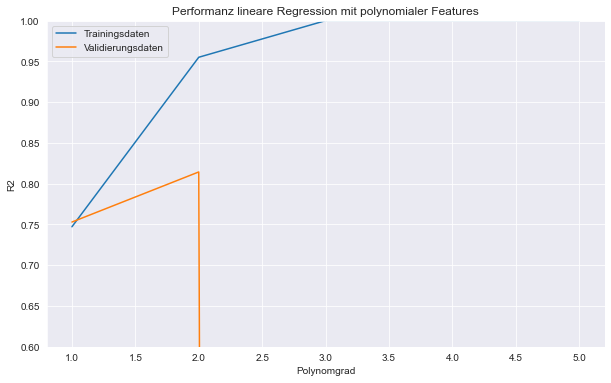

In [13]:
plt.figure(figsize=(10,6))
plt.plot(result[:,0],result[:,1], label="Trainingsdaten")
plt.plot(result[:,0],result[:,2], label="Validierungsdaten")
plt.xlabel('Polynomgrad')
plt.ylabel('R2')
plt.title("Performanz lineare Regression mit polynomialer Features")
plt.legend(loc='upper left')
plt.ylim((0.6,1.0))
plt.show()

Mit dieser Ergebnisse können wir festellen, dass mit zunehmender Potenz unseres Polynoms der Wert der Kosten für die Trainingsdaten besser und für die Validierungsdaten schlechter wird.
Aber die Frage, die sich dann stellt, ist, welchen wir für unser Modell wählen sollen?

In [14]:
i_opt = np.argmax(result[:,2])
p_opt = result[i_opt,0]
opt_reg_model = reg_models[i_opt]
r2_train = opt_reg_model.score(X_train, y_train)
r2_val = opt_reg_model.score(X_val, y_val)
r2_test = opt_reg_model.score(X_test, y_test)
print(f"Optimaler Polynomgrad: p={p_opt}")
print(f"R2 Train={r2_train:6.2f} Val={r2_val:6.2f} Test={r2_test:6.2f}")

Optimaler Polynomgrad: p=2.0
R2 Train=  0.96 Val=  0.81 Test=  0.61


Die Ergebnisse sind nicht immer zufriedenstellend, deshalb werden wir später die Kreuzvalidierungsmethode verwenden, um unser Modell zu optimieren.

Kreuzvalidierung und GridSearchCV
---------------------------

Dabei wird unser Modell in verschiedenen Ausschnitten der Trainingsdaten trainiert und validiert. 
In diesem Fall teilen wir es in fünf Teile (vier Teile trainieren und einen Teil validieren).
Wir werden diesen Prozess für unsere verschiedenen Polynome durchführen und so das beste Modell finden. Dazu benötigen wir das Modul GridSearchCV, das die Suche nach dem besten Modell übernimmt. 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regularisierte lineare Regression an ausgewählten Parametern (logarithmische Skala) für p = 2

In [17]:
p = 3
alpha = np.logspace(0,3,42)
nalpha = len(alpha)
result = np.zeros( (nalpha,) )
print("%10s %8s %8s %8s %8s %8s %8s %8s"%("alpha","CV1","CV2","CV3","CV4","CV5","Mean","Std"))
for i in range(nalpha):
    alphai = alpha[i]
    reg_poly = Pipeline([('scaler', StandardScaler()),('poly', PolynomialFeatures(degree=p,include_bias=False)),('reg',Ridge(alpha=alphai))])
    c = cross_val_score(reg_poly, X_train, y_train, cv=5)
    result[i] = c.mean()
    print("%10.2e %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f"%(alphai, c[0],c[1],c[2],c[3],c[4],c.mean(),c.std()))

i_opt = np.argmax(result)
alpha_opt = alpha[i_opt]
r2_opt = result[i_opt]
print(f"alpha_opt={alpha_opt:6.2e} R2={r2_opt:6.2f}")

     alpha      CV1      CV2      CV3      CV4      CV5     Mean      Std
  1.00e+00  -0.2373   0.7327  -1.6913   0.7755   0.7493   0.0658   0.9586
  1.18e+00  -0.2159   0.7493  -1.8212   0.7818   0.7691   0.0526   1.0113
  1.40e+00  -0.1827   0.7645  -1.9338   0.7883   0.7858   0.0444   1.0570
  1.66e+00  -0.1365   0.7782  -2.0227   0.7949   0.7997   0.0427   1.0934
  1.96e+00  -0.0773   0.7905  -2.0829   0.8017   0.8112   0.0486   1.1188
  2.32e+00  -0.0063   0.8014  -2.1107   0.8085   0.8208   0.0627   1.1318
  2.75e+00   0.0747   0.8109  -2.1038   0.8153   0.8287   0.0852   1.1318
  3.25e+00   0.1629   0.8190  -2.0618   0.8220   0.8354   0.1155   1.1185
  3.85e+00   0.2550   0.8256  -1.9858   0.8287   0.8409   0.1529   1.0924
  4.56e+00   0.3477   0.8308  -1.8785   0.8352   0.8457   0.1962   1.0545
  5.39e+00   0.4374   0.8346  -1.7436   0.8415   0.8498   0.2439   1.0060
  6.38e+00   0.5213   0.8371  -1.5857   0.8475   0.8533   0.2947   0.9486
  7.55e+00   0.5969   0.8383  -1.4101 

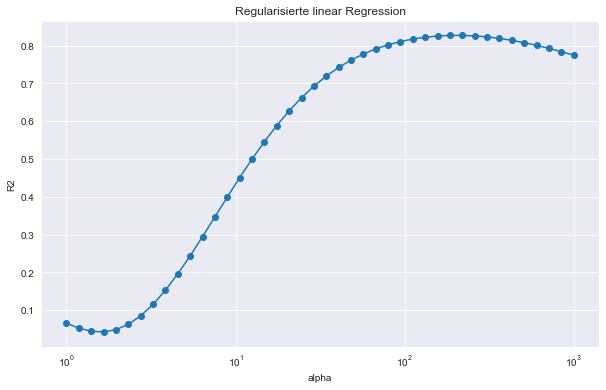

In [18]:
plt.figure(figsize=(10,6))
plt.semilogx(alpha, result, 'o-')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("Regularisierte linear Regression")
plt.show()

In [19]:
pipeline = Pipeline([('scaler', StandardScaler()),('poly', PolynomialFeatures(include_bias=False)),('reg',Ridge())])
parameters = {'poly__degree': np.arange(1,4), 'reg__alpha': np.logspace(-6,0,51)}
grid_pipeline = GridSearchCV(pipeline, parameters)
grid_pipeline.fit(X_train, y_train)
grid_pipeline.best_params_

{'poly__degree': 2, 'reg__alpha': 1.0}

In [20]:
reg_opt = grid_pipeline.best_estimator_

In [21]:
#Vorhersage
y_train_pred = reg_opt.predict(X_train)
y_test_pred = reg_opt.predict(X_test)

# Trainingsdaten
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training: R2={r2_train:6.2f} MSE={mse_train:8.2f}")
# Testdaten
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test: R2={r2_test:6.2f} MSE={mse_test:8.2f}")

Training: R2=  0.94 MSE=    5.40
Test: R2=  0.82 MSE=   13.47


Visualisierung

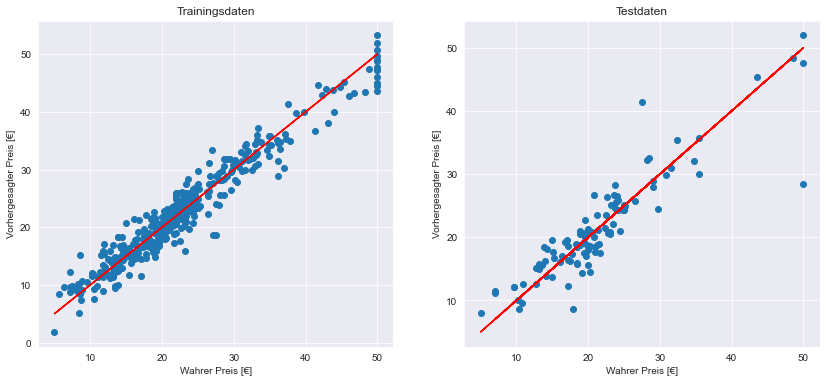

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
# Trainingsdaten
ax1.scatter(y_train, y_train_pred)
ax1.plot(y_train,y_train,'r')
ax1.set_title("Trainingsdaten")
ax1.set(xlabel='Wahrer Preis [€]', ylabel='Vorhergesagter Preis [€]')
# Testdaten
ax2.scatter(y_test, y_test_pred)
ax2.plot(y_test,y_test,'r')
ax2.set_title("Testdaten")
ax2.set(xlabel='Wahrer Preis [€]', ylabel='Vorhergesagter Preis [€]')
plt.show()

Die Werte unserer Kosten von 0,75 bis 0,94 für die Trainingsdaten und von 0,67 bis 0,82 für die Testdaten zeigen deutlich, dass unser Modell optimiert wurde. 

Lernkurve
---------

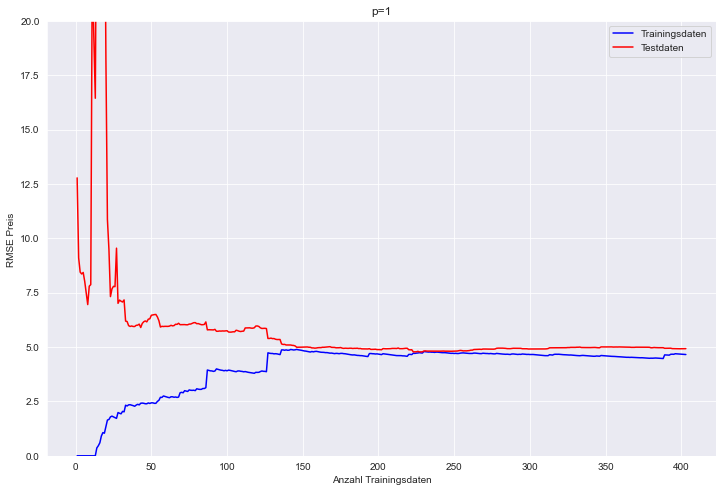

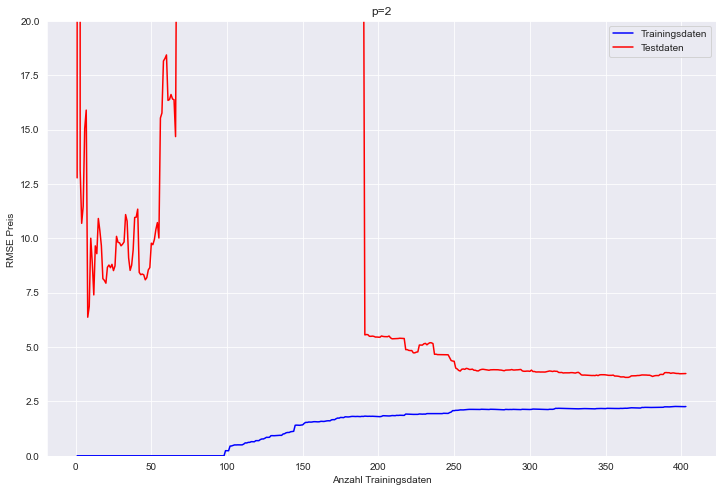

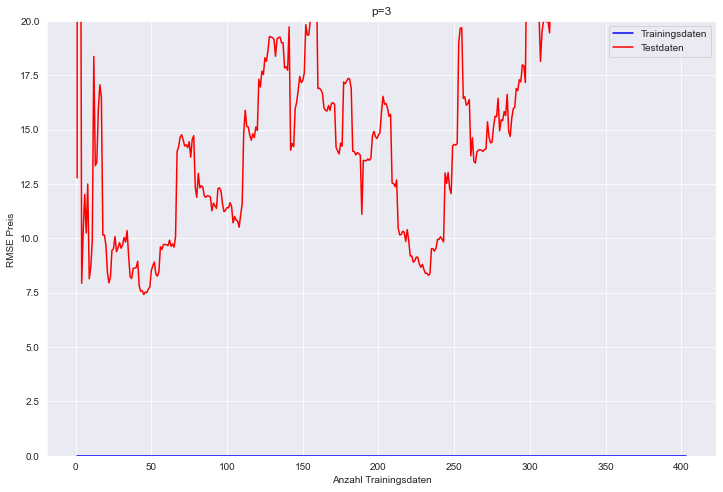

In [23]:
pp = [1,2,3]
for p in pp:
    ntrain = np.zeros( y_train.size-1)
    trainscore = np.zeros( y_train.size-1)
    testscore = np.zeros( y_train.size-1)
    for itrain in range(1,y_train.size):
        ntrain[itrain-1] = itrain
        reg_poly = Pipeline([('prescaler', StandardScaler()),('poly', PolynomialFeatures(degree=p,include_bias=False)),('scaler',StandardScaler()),('reg',LinearRegression())])
        reg_poly.fit(X_train[:itrain],y_train[:itrain])
        y_train_pred = reg_poly.predict(X_train[:itrain])
        y_test_pred = reg_poly.predict(X_test)
        testscore[itrain-1] = np.sqrt(mean_squared_error(y_test, y_test_pred))
        trainscore[itrain-1] = np.sqrt(mean_squared_error(y_train[:itrain], y_train_pred))
    plt.figure(figsize=(12,8))
    plt.plot(ntrain, trainscore, c="blue", label="Trainingsdaten")
    plt.plot(ntrain, testscore, c="red", label="Testdaten")
    plt.legend(loc="upper right")
    plt.title(f"p={p}")
    plt.xlabel("Anzahl Trainingsdaten")
    plt.ylabel("RMSE Preis ")
    plt.ylim((0,20))
    plt.show()
    
    

In der ersten Kurve p=1 sehen wir, dass, wenn wir anfangs nur wenige Daten senden, sich das Modell gut an die Trainingsdaten anpasst, während es sich bei den Testdaten nicht gut anpassen kann, da es nicht genügend Daten erhalten hat. Wenn wir dem System jedoch genügend Daten zur Verfügung stellen, stellen wir fest, dass die Trainingsdaten immer mehr werden, bis sie ein Niveau erreichen, auf dem sie sich nicht mehr verändern, selbst wenn wir dem System weiterhin mehr Daten zur Verfügung stellen, könnte die Ursache dafür eine schlechte Wahl des Modells sein, das zu einem bestimmten Zeitpunkt nicht mehr linear ist. Im Gegensatz dazu beginnt das Testspiel, das zuvor keinen guten RMSE hatte, sich zu verbessern, wenn es mit Daten versorgt wird, und bleibt zu einem bestimmten Zeitpunkt nahezu konstant und ändert sich nicht mehr. Die Lösung besteht darin, ein komplexeres Modell zu wählen.  
In der zweiten Kurve, wenn p=2, sehen wir, dass die Kurve ein wenig ähnlich ist wie bei p=1, aber hier sehen wir, dass die Trainingsdaten deutlich besser sind als in der ersten Kurve, je mehr Daten wir senden, desto mehr sehen wir, wie sich das Modell und die Testdaten verbessern. In unserer Kurve sehen wir, dass der RMSE für die Trainings- und Testdaten so nahe beieinander liegen, aber mangels ausreichender Daten erhalten wir kein zufriedenstellendes Ergebnis. Hier haben wir einen Fall von Overfitting und um diesen zu beheben, müssen wir dem Modell mehr Daten zur Verfügung stellen.
Im dritten Bild haben wir es mit einem Fall von Overfitting zu tun, hier haben unsere Trainingsdaten einen guten RMSE, denn wir sehen, dass der RMSE der Testdaten sehr schlecht ist, also kann unser Modell nicht richtig angepasst werden, weil wir eine Potenz von p=3 gewählt haben, die gut auf die Trainingsdaten passt, aber nicht auf die Testdaten. Die Lösung ist einfach 2 als Potenz für das Polynom.

